**Sobre o conjunto de dados**

Este conjunto de dados fornece uma visão geral abrangente das transações de vendas online em diferentes categorias de produtos. Cada linha representa uma única transação com informações detalhadas como ID do pedido, data, categoria, nome do produto, quantidade vendida, preço unitário, preço total, região e forma de pagamento.

Percepções:
1. Analise as tendências de vendas ao longo do tempo para identificar padrões sazonais ou oportunidades de crescimento.
2. Explore a popularidade de diferentes categorias de produtos em todas as regiões.
3. Investigue o impacto dos métodos de pagamento no volume de vendas ou receita.


Impotando a base de dados

In [162]:
# Importando a base de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando as configurações do pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [163]:
# Importando a base de dados
df = pd.read_csv('Online Sales Data.csv')

# Visualizando a base de dados
display(df)


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [164]:
# Renomeando as colunas
df = df.rename(columns={
    'Transaction ID':'ID do produto',
    'Date':'Data',
    'Product Category':'Categoria',
    'Product Name':'Produto',
    'Units Sold':'Quantidade',
    'Unit Price':'Preço unitário',
    'Total Revenue':'Preço total',
    'Region':'Região',
    'Payment Method':'Método de pagamento'
})


In [165]:
# Analisando o tipo das variavéis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID do produto        240 non-null    int64  
 1   Data                 240 non-null    object 
 2   Categoria            240 non-null    object 
 3   Produto              240 non-null    object 
 4   Quantidade           240 non-null    int64  
 5   Preço unitário       240 non-null    float64
 6   Preço total          240 non-null    float64
 7   Região               240 non-null    object 
 8   Método de pagamento  240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [166]:

# Convertendo a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Verificando a mudança
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID do produto        240 non-null    int64         
 1   Data                 240 non-null    datetime64[ns]
 2   Categoria            240 non-null    object        
 3   Produto              240 non-null    object        
 4   Quantidade           240 non-null    int64         
 5   Preço unitário       240 non-null    float64       
 6   Preço total          240 non-null    float64       
 7   Região               240 non-null    object        
 8   Método de pagamento  240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [167]:
# Removendo a coluna ID do produto
vendasOnline = df.drop(columns=['ID do produto'])

# Remover os pontos dos preços e converter para float
df[['Preço unitário', 'Preço total']] = df[['Preço unitário', 'Preço total']].replace({'\.': ''}, regex=True)


# Exibir o DataFrame resultante para verificar a remoção dos pontos
display(vendasOnline)


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\55119\AppData\Local\Temp\ipykernel_17740\3538314013.py:5: SyntaxWarning: invalid escape sequence '\.'
  df[['Preço unitário', 'Preço total']] = df[['Preço unitário', 'Preço total']].replace({'\.': ''}, regex=True)


,Data,Categoria,Produto,Quantidade,Preço unitário,Preço total,Região,Método de pagamento
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...
235,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


Analisando os Dados

In [168]:
# Verificando o período das compras
dataMin = vendasOnline['Data'].min()
dataMax = vendasOnline['Data'].max()

print(f'A menor data é', dataMin,'e a maior data é', dataMax)

A menor data é 2024-01-01 00:00:00 e a maior data é 2024-08-27 00:00:00


In [186]:
# Analisando as medidas de tendência
contagem_preco_total = df['Preço unitário'].describe()
print(round(contagem_preco_total,2))


 

count     240.00
mean      236.40
std       429.45
min         6.50
25%        29.50
50%        89.99
75%       249.99
max      3899.99
Name: Preço unitário, dtype: float64


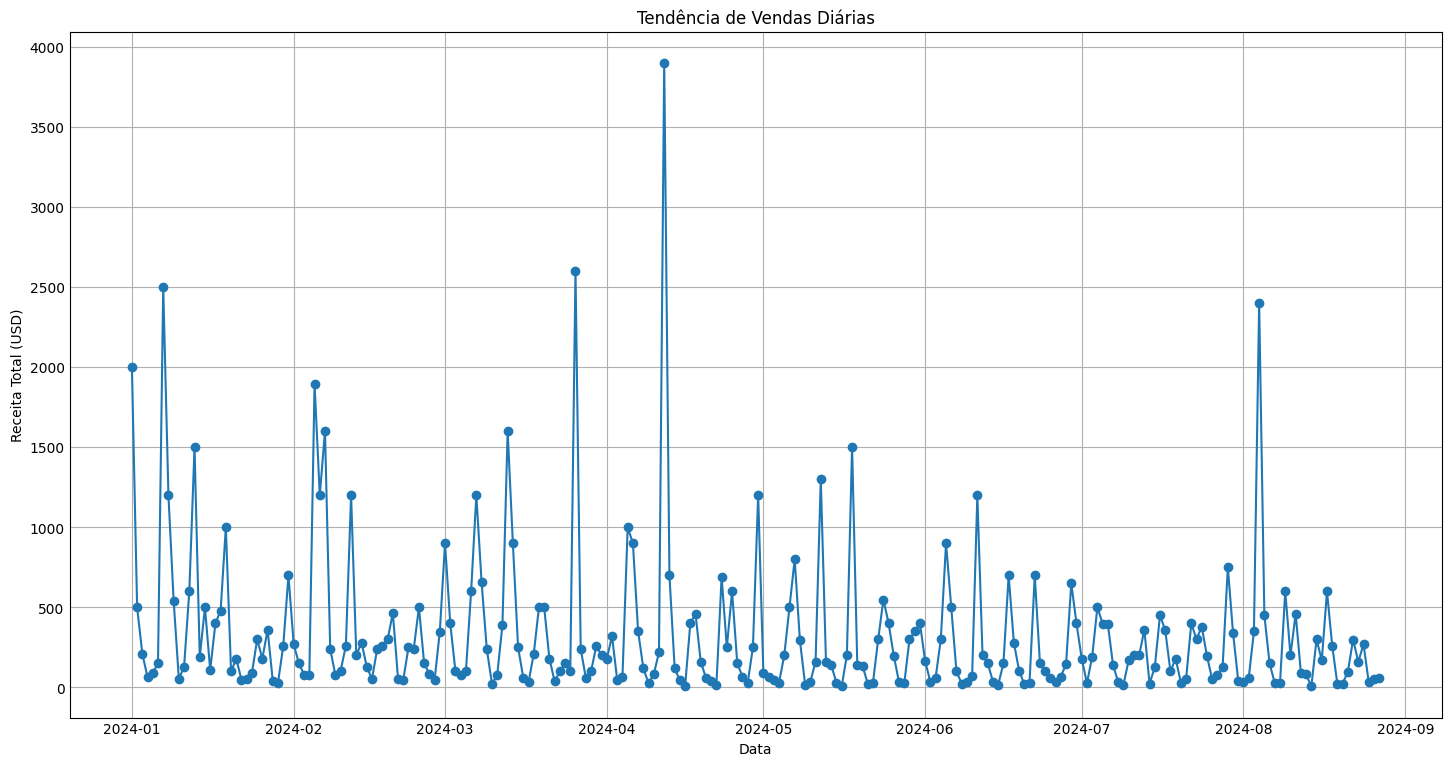

C:\Users\55119\AppData\Local\Temp\ipykernel_17740\2542367294.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('tab10', len(vendas_por_categoria.columns))  # 'tab10' é um mapa de cores com 10 cores distintas


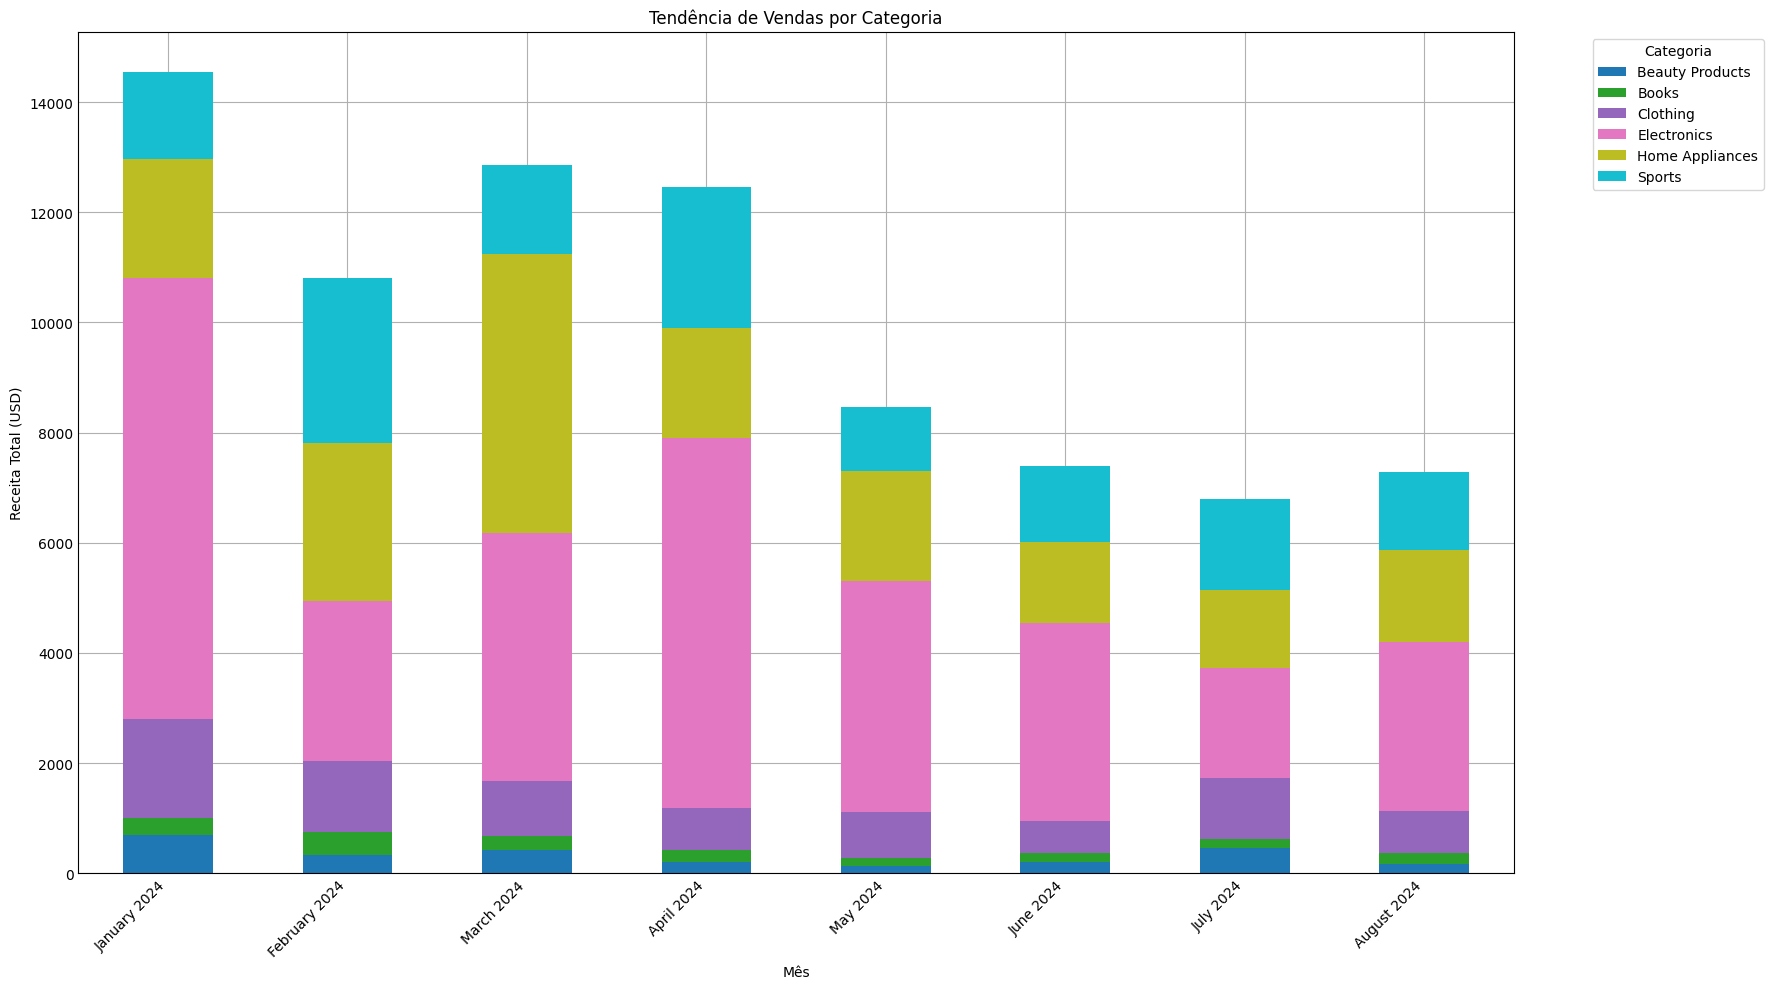

In [169]:
# Analisando as tendências de vendas ao longo do tempo para identificar padrões sazonais ou oportunidades de crescimento.

# Agrupar as vendas por data para analisar as vendas totais ao longo do tempo
vendas_diarias = df.groupby('Data').sum()['Preço total']

# Plotar a tendência de vendas diárias
plt.figure(figsize=(14, 7))
plt.plot(vendas_diarias.index, vendas_diarias.values, marker='o')
plt.title('Tendência de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Receita Total (USD)')
plt.grid(True)
plt.show()

# Agrupar as vendas por mês e categoria, e somar os preços totais
vendas_por_categoria = df.groupby([pd.Grouper(key='Data', freq='M'), 'Categoria']).sum(numeric_only=True)['Preço total'].unstack()

# Definir uma paleta de cores personalizada
cores = plt.cm.get_cmap('tab10', len(vendas_por_categoria.columns))  # 'tab10' é um mapa de cores com 10 cores distintas

# Plotar a tendência de vendas por categoria como gráfico de barras empilhadas
plt.figure(figsize=(18, 10))
vendas_por_categoria.plot(kind='bar', stacked=True, ax=plt.gca(), color=cores.colors)
plt.title('Tendência de Vendas por Categoria')
plt.xlabel('Mês')
plt.ylabel('Receita Total (USD)')
plt.grid(True)

# Ajustar os rótulos do eixo x para exibir apenas os meses
plt.xticks(ticks=range(len(vendas_por_categoria.index)), labels=[date.strftime('%B %Y') for date in vendas_por_categoria.index], rotation=45, ha='right')

plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta o layout para evitar corte de rótulos
plt.show()

In [170]:
# Agrupar por Categoria e somar o preço total
vendas_por_categorias = df.groupby('Categoria')['Preço total'].sum().sort_values(ascending=True)

print(vendas_por_categorias)


Categoria
Books               1861.93
Beauty Products     2621.90
Clothing            8128.93
Sports             14326.52
Home Appliances    18646.16
Electronics        34982.41
Name: Preço total, dtype: float64


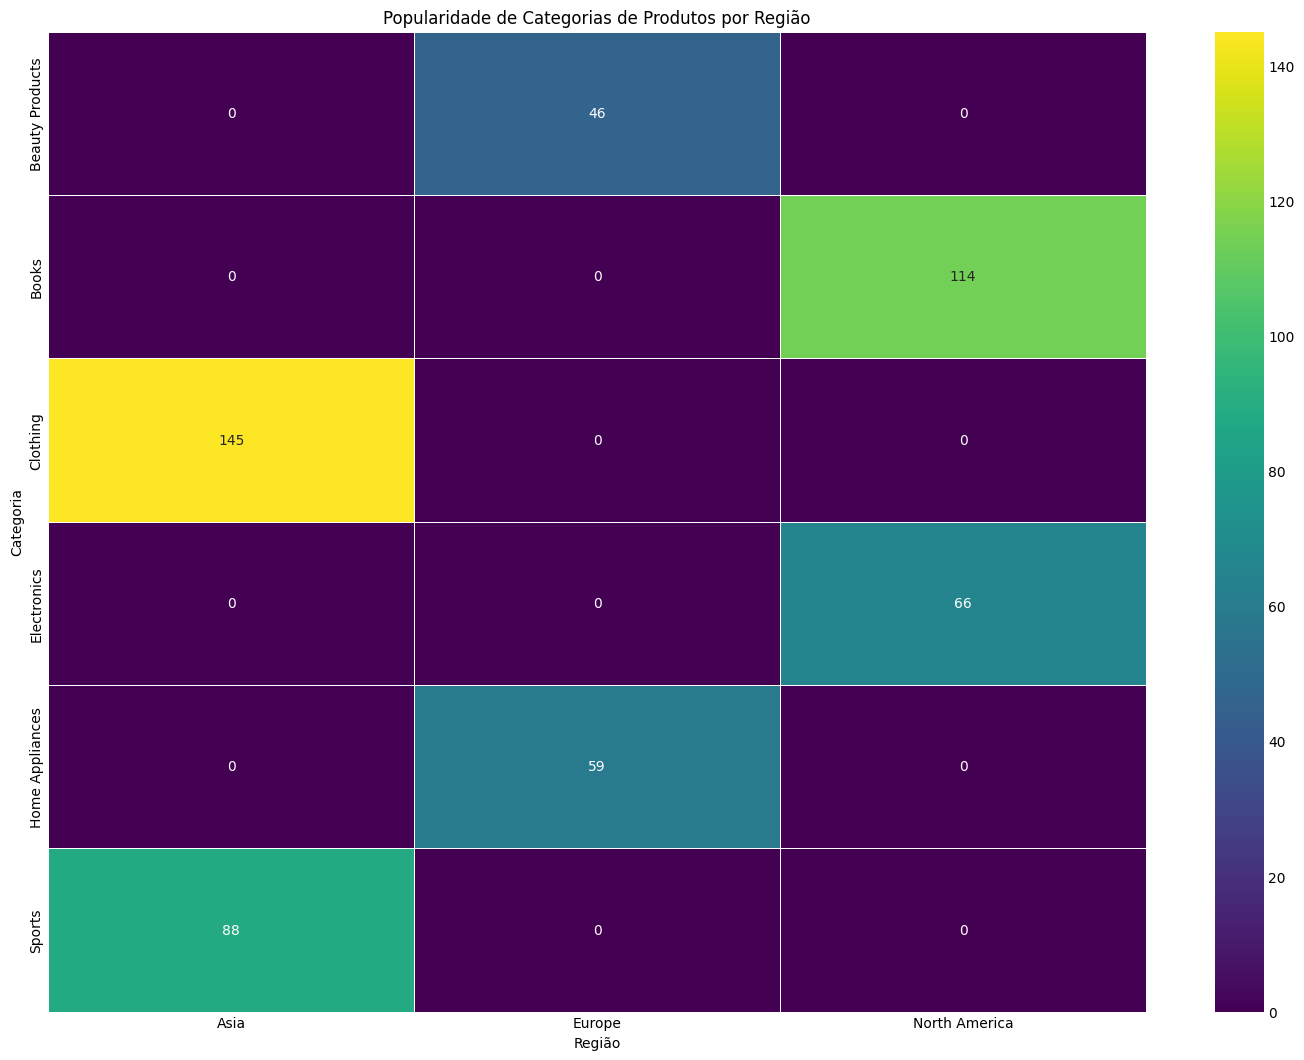

In [171]:
# Agrupar por categoria e região e somar as quantidades
popularidade_por_categoria_regiao = df.groupby(['Categoria', 'Região'])['Quantidade'].sum().unstack(fill_value=0)

# Plotar o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(popularidade_por_categoria_regiao, annot=True, cmap='viridis', fmt='.0f', linewidths=.5)
plt.title('Popularidade de Categorias de Produtos por Região')
plt.xlabel('Região')
plt.ylabel('Categoria')
plt.show()

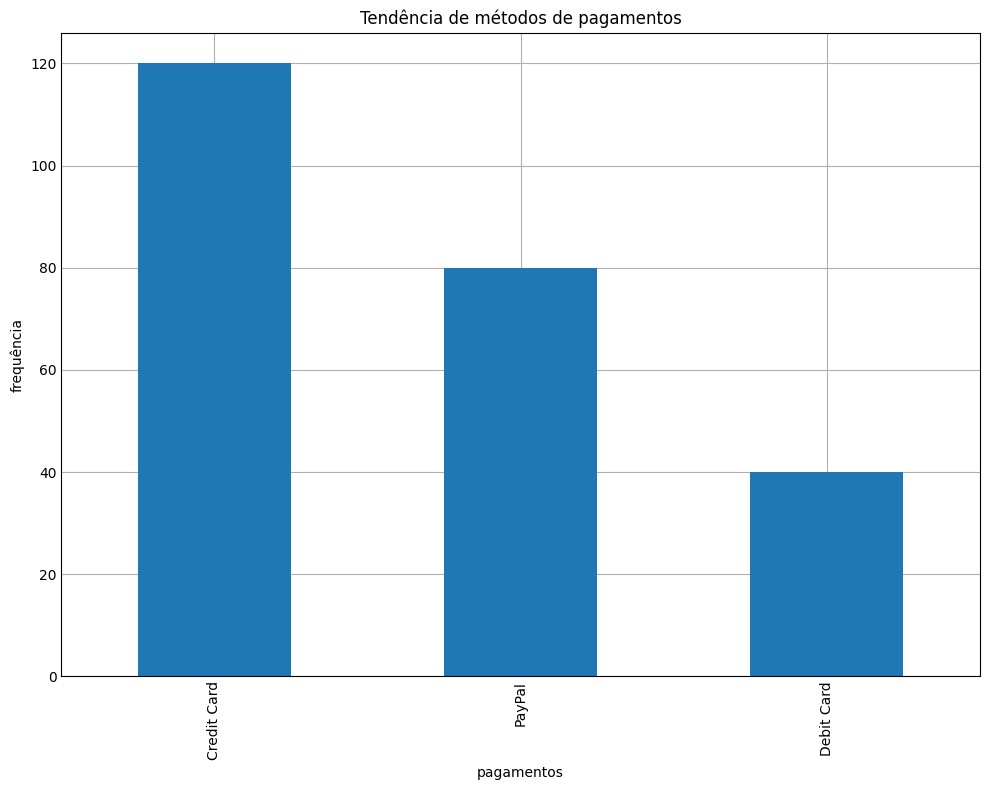

In [175]:
# Investigue o impacto dos métodos de pagamento no volume de vendas ou receita.
total_pagamentos = df['Método de pagamento'].value_counts()

plt.figure(figsize=(10,8))
total_pagamentos.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tendência de métodos de pagamentos')
plt.xlabel('pagamentos')
plt.ylabel('frequência')
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para evitar corte de rótulos
plt.show()


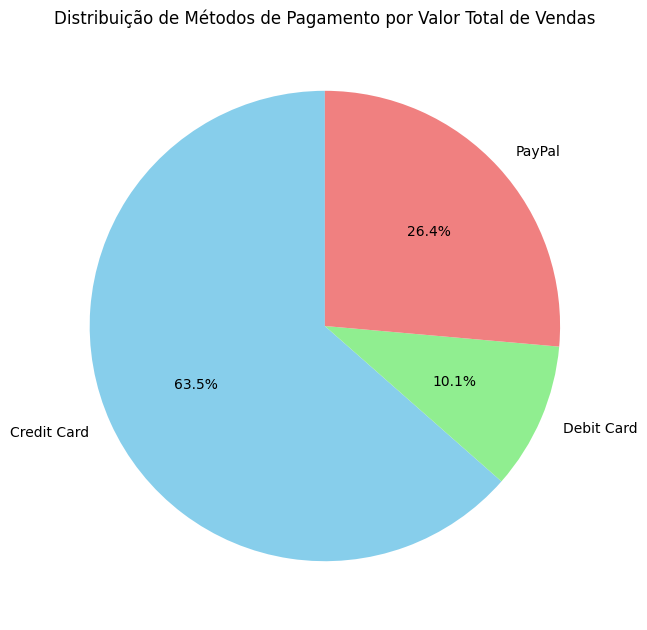

In [182]:
# Agrupar por método de pagamento e somar os preços totais
vendas_por_metodo = df.groupby('Método de pagamento')['Preço total'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
vendas_por_metodo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Distribuição de Métodos de Pagamento por Valor Total de Vendas')
plt.ylabel('')
plt.show()



**Conclusão**

Ao analisar o conjunto de dados podemos perceber que nos meses de Janeiro, Fevereiro, Abril  e Agosto são os meses com maior indice de Receita, sendo o mês de Abril o mês com o maior indice de receita (4.000).

As categorias mais vendidas são: Electronics 34,982,41, Home Appliances 18,646,16, Sports 14,326,52, Clothing 8,128,93, Beauty Products 2,621,90 e Books 1,861,93, dentro do indice dos meses citado, sendo uma queda a partir do 4 mês.

As categorias mais populares estão na região da Asia sendo (Clothin a mais popular seguida da categoria de sports), já na região Européia as categorias (Home Appliances e Beauty Products) se destacam, e a região da América do Norte possue como destaques (Electronics e Books), sendo das regiões com maior indice de popularidade a Asia. 

O Método de pagamento mais utilizado pelos consumidores é o credit card com cerca de 63.5% seguido da plataforma Paypal com 26.4% e o debit card com 10.1% das vendas.




